In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

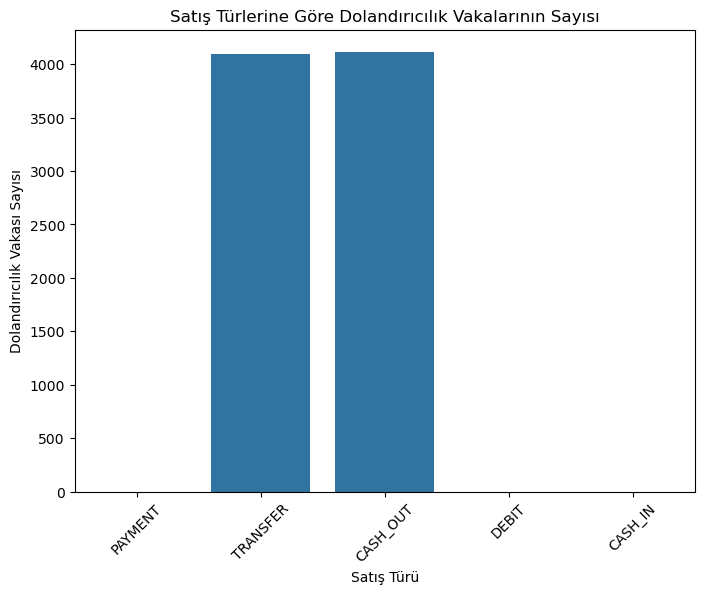

In [7]:
unique_types = df['type'].unique()


fraud_counts = df[df['isFraud'] == 1]['type'].value_counts()


fraud_counts = fraud_counts.reindex(unique_types, fill_value=0)

plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Satış Türlerine Göre Dolandırıcılık Vakalarının Sayısı')
plt.xlabel('Satış Türü')
plt.ylabel('Dolandırıcılık Vakası Sayısı')
plt.xticks(rotation=45) 
plt.show()

In [8]:
df.drop(['step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

In [9]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [10]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [11]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [12]:
### Buraya kadarki işlemler arasından 52. kod bloğu hariç hepsi aynı olduğundan açıkladım. 52'de kaç farklı değer olduğunu görmek istediğim için kullandım.

In [13]:
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','isFlaggedFraud']

In [14]:
### Step 0: veri analizine uygun sütünları ayırıyoruz.

In [15]:
df_numeric = df[numeric_cols]

In [16]:
### step 1: Sayısal sütunları içeren yeni veri seti oluşturuyorum.

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [19]:
### step 2: veri standartlaştırma işlemi.

In [20]:
# K-Means modelini oluşturalım
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [21]:
### step 3: K-Means modeli oluştuyorum ve 3 küme belirliyorum.

In [22]:
df['cluster'] = kmeans.labels_

In [23]:
### step 4: Küme sonuçlarını veri setine ekliyorum.

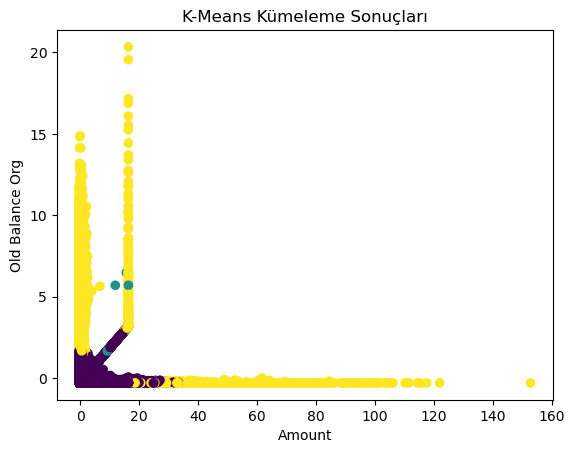

In [24]:
# Küme dağılımlarını görselleştirme
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Kümeleme Sonuçları')
plt.xlabel('Amount')
plt.ylabel('Old Balance Org')
plt.show()

In [25]:
### step 5: küme dağılımını görselleştrmek için matplotlib kullanıyorum.

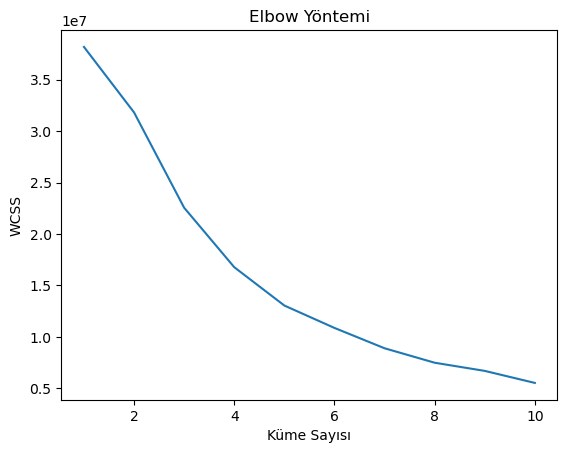

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Yöntemi')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()

In [27]:
### step 6: elbow yöntemi ile doğru WCSS değerini bulmaya çalışıyorum.

In [28]:
model = KMeans(n_clusters=3)
training_points = df_scaled[:1000]
test_points = df_scaled[1000:]
model.fit(training_points)
labels = model.predict(test_points)

In [29]:
### step 7: eğitimde kullanılmayan veriler üzerinden tahmin yürütmey çalışıyorum. bir bakıma eğitiyorum denebilir.

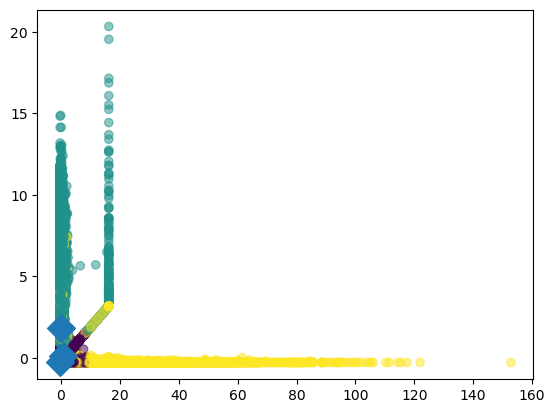

In [30]:
xs = test_points[:,0]
ys = test_points[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

In [31]:
### step 8: kümelerin centroid(merkezi) ggörmek amacıyla görselleştirme yaptım.

In [32]:
from sklearn.decomposition import PCA

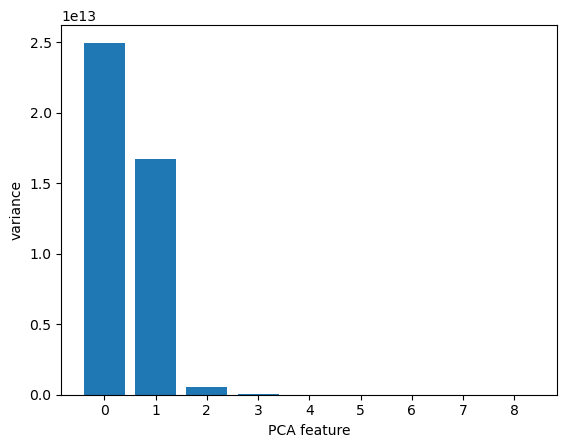

In [33]:
pca = PCA()
pca.fit(df)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [34]:
print(pca.components_)

[[-3.17389754e-08  4.65180300e-02  9.44876008e-02  9.60034284e-02
   6.72195002e-01  7.26529688e-01 -1.34901485e-11 -8.43551414e-15
   1.94473510e-08]
 [-1.09600149e-07 -1.05452349e-02  6.96261324e-01  7.04848340e-01
  -7.95907696e-02 -1.09375927e-01  9.68698752e-12  1.49385517e-12
   8.78180772e-08]
 [ 2.76735982e-07  7.21501748e-01  2.44123604e-02 -4.59438052e-03
  -5.31546959e-01  4.43030458e-01  3.01077052e-09  1.64054049e-11
   8.27948866e-09]
 [ 5.53124801e-07 -6.90555411e-01  3.88494611e-02 -2.65150530e-02
  -5.08011189e-01  5.12684628e-01 -1.31491831e-08 -1.55541214e-10
  -4.85175582e-09]
 [ 3.22007070e-06  1.71267007e-02  7.10061278e-01 -7.02316170e-01
   3.46648370e-02 -3.27109234e-02  1.37856035e-07  3.88070323e-11
   7.19390361e-09]
 [-9.99992162e-01 -1.27470712e-07  2.23534993e-06 -2.35731011e-06
  -3.29086987e-07  2.89816487e-07  2.37130870e-03 -6.43372339e-06
  -3.17068328e-03]
 [ 3.17302816e-03  9.81686251e-09  6.09142367e-08  6.63796153e-08
   5.43053659e-09  4.5595029

In [35]:
### step 9: burda aslında veri işleme yapıyorum. veri sadeleştirme ve öenmli özellikleri belirlemek için yaptım.

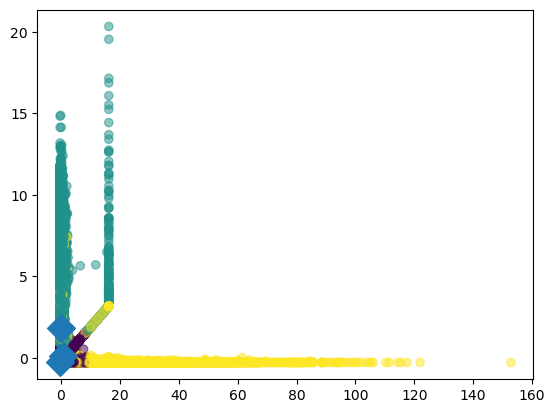

In [74]:
xs = test_points[:,0]
ys = test_points[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

In [ ]:
### step 9.1: sadeleştirmeden sonra değişiklik olmuş mu kontrolunu yaptım.

In [36]:
pca = PCA(n_components=2)
pca.fit(df)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.59007217 0.39557502]
0.9856471893394672


In [ ]:
### step 10: veri kaybı olmadan orijinal veri setinin ne kadarını ilk iki bileşen ile temsil etiiğinin çıktısını kontrol ettim.